In [1]:
setwd('/Users/alexis/Library/CloudStorage/OneDrive-UniversityofNorthCarolinaatChapelHill/CEMALB_DataAnalysisPM/Projects/P1002. Ecig Metabolomics NELF/P1002.3. Analyses/P1002.3.4. ML Visualizations/P1002.3.4.1. Variable Importance Plot/Input')
Output = ('/Users/alexis/Library/CloudStorage/OneDrive-UniversityofNorthCarolinaatChapelHill/CEMALB_DataAnalysisPM/Projects/P1002. Ecig Metabolomics NELF/P1002.3. Analyses/P1002.3.4. ML Visualizations/P1002.3.4.1. Variable Importance Plot/Output')
cur_date = "042122"

library(readxl)
library(tidyverse)
library(ggrepel)
library(tidytext)

#reading in files
var_imp_all = data.frame(read_excel("041222_Significant_MFs_noise.xlsx"))
var_imp_wo_nictotine_cotinine = data.frame(read_excel("041222_Significant_MFs_wo_nicotine_noise.xlsx"))

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.8
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
#creating a col that specifies which the Type variable before creating 1 df
var_imp_all$Type = "All Predictors"
var_imp_wo_nictotine_cotinine$Type = "No Nicotine & Cotinine"

var_imp_df = full_join(var_imp_all, var_imp_wo_nictotine_cotinine)

head(var_imp_df)

Joining, by = c("MF", "MeanDecreaseGini", "Type")


,MF,MeanDecreaseGini,Type
,<chr>,<dbl>,<chr>
1,MF_97,2.6118845,All Predictors
2,MF_5,1.8559144,All Predictors
3,MF_292,0.7185532,All Predictors
4,MF_7221,0.3767431,All Predictors
5,MF_29367,0.2427987,All Predictors
6,MF_6955,0.1876891,All Predictors


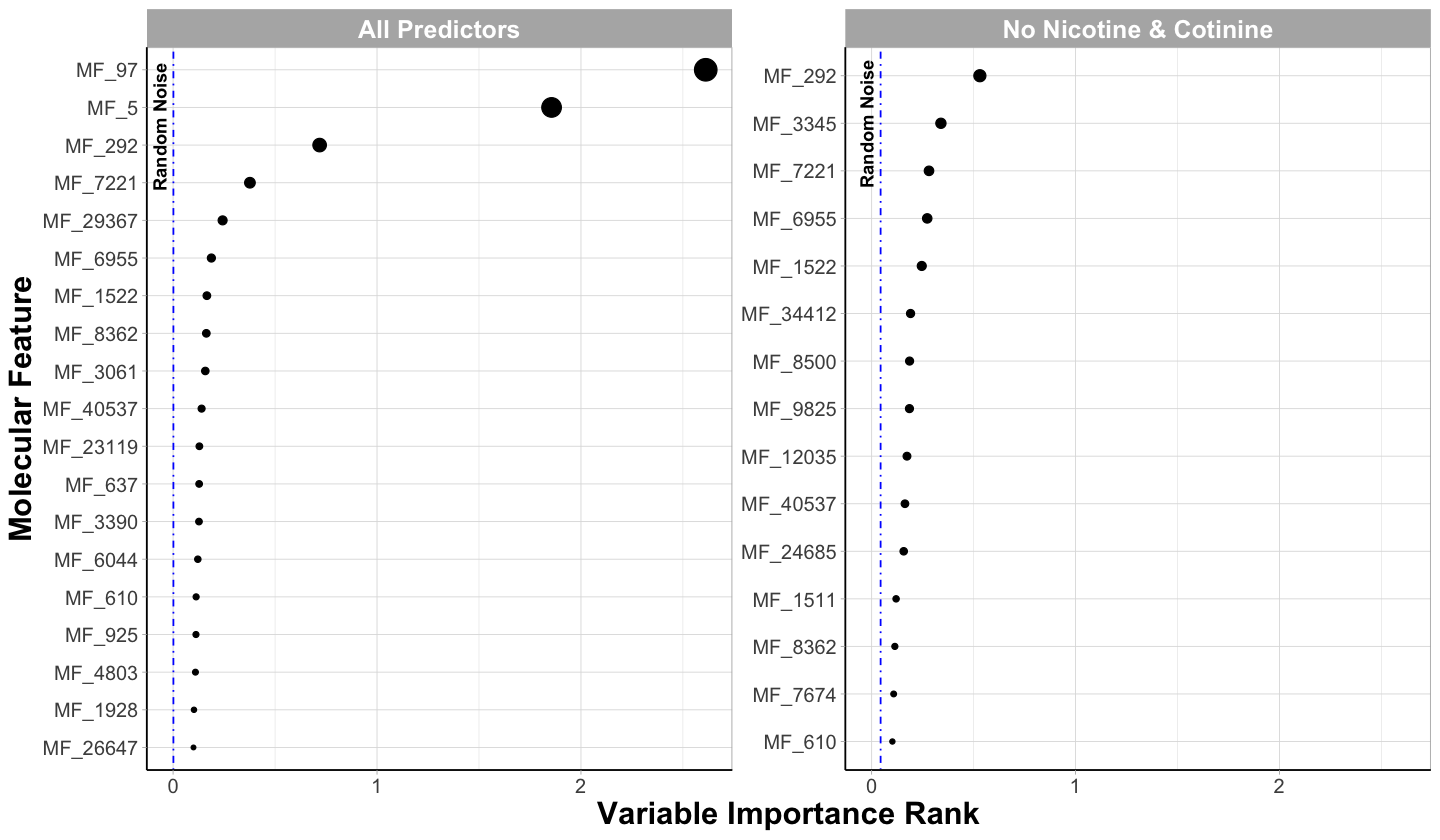

In [3]:
options(repr.plot.width=12, repr.plot.height=7) #changing size

#only plotting features w/ a mean decrease gini > 0.2
FigureX = ggplot() + 
  geom_point(data = var_imp_df %>% 
             filter(MeanDecreaseGini > 0.1), 
             aes(x = MeanDecreaseGini, y = reorder_within(MF, MeanDecreaseGini, Type), 
                 size = MeanDecreaseGini)) + 
  geom_vline(data = var_imp_df %>% 
             filter(MF == "noise5"),
             aes(xintercept = MeanDecreaseGini), color = "blue", linetype = "dotdash") +

  #adding text to verticle background noise lines
  geom_text(data = var_imp_df %>% 
             filter(MF == "noise5", Type == "All Predictors"),
            aes(x = MeanDecreaseGini, label = "Random Noise\n", y = 17.5), angle = 90, fontface = "bold") +
  geom_text(data = var_imp_df %>% 
             filter(MF == "noise5", Type == "No Nicotine & Cotinine"),
            aes(x = MeanDecreaseGini, label = "Random Noise\n", y = 14), angle = 90, fontface = "bold") +

  facet_wrap(~Type, scales = 'free_y') + 

  theme_light() + 
  theme(axis.line = element_line(colour = "black"), #making x and y axes black
        axis.text = element_text(size = 12), #changing size of x axis labels
        axis.title = element_text(face = "bold", size = rel(1.7)), #changes axis titles
        legend.title = element_text(face = 'bold', size = 14), #changes legend title
        legend.text = element_text(size = 12), #changes legend text
        strip.text.x = element_text(size = 15, face = "bold"), #changes size of facet x axis 
        strip.text.y = element_text(size = 15, face = "bold")) + #changes size of facet y axis 
  labs(x = 'Variable Importance Rank', y = 'Molecular Feature') + #changing axis labels 
  
  #this removes Type variable from y axes
  scale_y_reordered() +
  #removing size legend
  guides(size = "none")

FigureX

In [4]:
#exporting figure
ggsave(FigureX, 
       filename = 'FigureX.pdf',
       path = Output,
       width = 12, height = 7)